<a href="https://colab.research.google.com/github/Hyun-Ho95/Web1/blob/master/MiniProject2(EDA)_%EB%B0%95%ED%98%84%ED%98%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 포항시 교통카드 버스 이용내역 


# 📝 데이터(파일) 수집

## 라이브러리 불러오기


In [10]:
import time
import numpy as np
import pandas as pd
import requests
#시각화를 위한 matplolib
import matplotlib.pyplot as plt

## matplotlib의 한글 지원 라이브러리

In [11]:
# 한글폰트 사용을 위해 설치
!pip install koreanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
import koreanize_matplotlib

# 그래프에 retina display 적용 (흐릿함 방지)
%config InlineBackend.figure_format = 'retina'
# 노트북 안에서 그래프를 바로 디스플레이 해주는 설정
%matplotlib inline

## plotly 라이브러리

In [13]:
import plotly

plotly.__version__

'5.5.0'

## 지도 시각화를 위해 설치 
conda install -c conda-forge folium


In [14]:
#!pip install folium
import folium

## 포항시 버스 이용자 교통카드 사용 내역
### 💡 주요 내용
###   ✅ 승차/하차 정류소 및 승객수 지도에 시각화
###   ✅ 승차/하차 승객 수 상위 10개 정류장/노선 시각화
###   ✅ 선택 정류장의 승차/하차 승객 수 시각화
###   ✅ 22/03/01~22/03/07 동안 버스이용 데이터

## ● 주피터노트북일 경우


*   glob 사용. 프로젝트는 코랩이라 주석처리





In [15]:
# 파일 경로 - ("C:/Users\black/AI SCHOOL 8기/data/trfcard.csv")
# glob : 주어진 인자에 맞는 파일 경로를 리스트로 반환
# from glob import glob
# files = glob('data/trfcard*.csv')
# files_path = sorted(files)
# files_path
#first,mid,last는 그냥 홈페이지에서 파일 가져온 순서

# df_fir = pd.read_csv(files_path[0]) # 2020/03/31
# df_fir.head(2)

# df_mid = pd.read_csv(files_path[1]) # 2020/03/12
# df_mid.head(2)

# df_last = pd.read_csv(files_path[2]) # 2020/03/25
# df_last.head(2)

# df_p = pd.concat([df_fir,df_mid,df_last])

## ● 코랩일 경우

In [16]:
df_p = pd.read_csv('trfcard.csv')

In [17]:
# 날짜 순서대로 정렬
df = df_p.sort_values('on_date',ascending=True)

In [18]:
df.info()
# 날짜가 가독성이 떨어지고, 현재 int type으로 되어있음 => 날짜형식으로 변경

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36718 entries, 0 to 36717
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   on_date      36718 non-null  int64  
 1   off_date     36718 non-null  int64  
 2   route_name   36718 non-null  object 
 3   descr        36718 non-null  object 
 4   age_type     36718 non-null  object 
 5   trans_yn     36718 non-null  object 
 6   addfee_yn    36718 non-null  object 
 7   start_bstop  36718 non-null  object 
 8   start_gps_x  36718 non-null  float64
 9   start_gps_y  36718 non-null  float64
 10  end_bstop    36718 non-null  object 
 11  end_gps_x    36718 non-null  float64
 12  end_gps_y    36718 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 3.9+ MB


In [19]:
# astype.(str)로 변경 후에 astype.('datetime64')로 변경
# 그냥 astype.('datetime64')하면 에러나거나 1970년? 이 나옴
df['on_date'] = df['on_date'].astype(str).astype('datetime64')
df['off_date'] = df['off_date'].astype(str).astype('datetime64')

In [20]:
# 컬럼들의 영어이름 헷갈리므로 (+가독성 위해) 홈페이지에서 제공하는 문서 내의 컬럼명으로 변경해주기
cols = ['승차시각', '하차시각','노선명', '노선경유지', '승객연령', '환승여부',
        '추가운임여부', '승차정류장', '승차정류장 GPS X', '승차정류장 GPS Y',
        '하차정류장', '하차정류장 GPS X', '하차정류장 GPS Y']
df.columns = cols

# 📊 데이터 전처리 및 시각화

## 데이터 분석

In [21]:
df.isnull().sum()

승차시각           0
하차시각           0
노선명            0
노선경유지          0
승객연령           0
환승여부           0
추가운임여부         0
승차정류장          0
승차정류장 GPS X    0
승차정류장 GPS Y    0
하차정류장          0
하차정류장 GPS X    0
하차정류장 GPS Y    0
dtype: int64

In [22]:
df.duplicated().sum()

0

In [23]:
df.dtypes

승차시각           datetime64[ns]
하차시각           datetime64[ns]
노선명                    object
노선경유지                  object
승객연령                   object
환승여부                   object
추가운임여부                 object
승차정류장                  object
승차정류장 GPS X           float64
승차정류장 GPS Y           float64
하차정류장                  object
하차정류장 GPS X           float64
하차정류장 GPS Y           float64
dtype: object

In [24]:
df.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            36708, 36709, 36710, 36711, 36712, 36713, 36714, 36715, 36716,
            36717],
           dtype='int64', length=36718)

In [25]:
#나중에 지도 시각화 할 때 유용하게 사용할 수 있을 것 같다
df.describe()

,승차정류장 GPS X,승차정류장 GPS Y,하차정류장 GPS X,하차정류장 GPS Y
count,36718.000000,36718.000000,36718.000000,36718.000000
mean,129.370183,36.032621,129.369419,36.030132
std,0.049462,0.045882,0.040717,0.036492
min,129.025585,35.804119,129.052958,35.804119
25%,129.350580,36.006417,129.354538,36.013250
50%,129.366210,36.029520,129.365460,36.033299
75%,129.387127,36.064088,129.371682,36.041941
max,129.579045,36.303479,129.578203,36.291213


In [26]:
df.describe(include='O')
# 가장 많이 이용하는 버스 '105 번'
# 가장 많이 가는 경유지 '양덕 - 시외버스터미널 -지곡'
# 승차와 하차가 가장 많은 정류장 '죽도시장', '시외버스터미널'
# 가장 많은 승객연령 '일반' 

,노선명,노선경유지,승객연령,환승여부,추가운임여부,승차정류장,하차정류장
count,36718,36718,36718,36718,36718,36718,36718
unique,56,80,4,2,2,638,551
top,105,양덕-시외터미널-지곡,일반,N,N,시외버스터미널,죽도시장
freq,4146,4146,35051,34379,36276,1720,6136


## 💡 Point 1. 가장 많이 이용하는 버스? (plotbar + axvline)

In [27]:
# 범주형 변수의 기술통계 값으로 알 수 있는 값들이긴 하지만 배운 것 활용하기 위해 시도

Text(0.5, 0, '버스 이용 수')

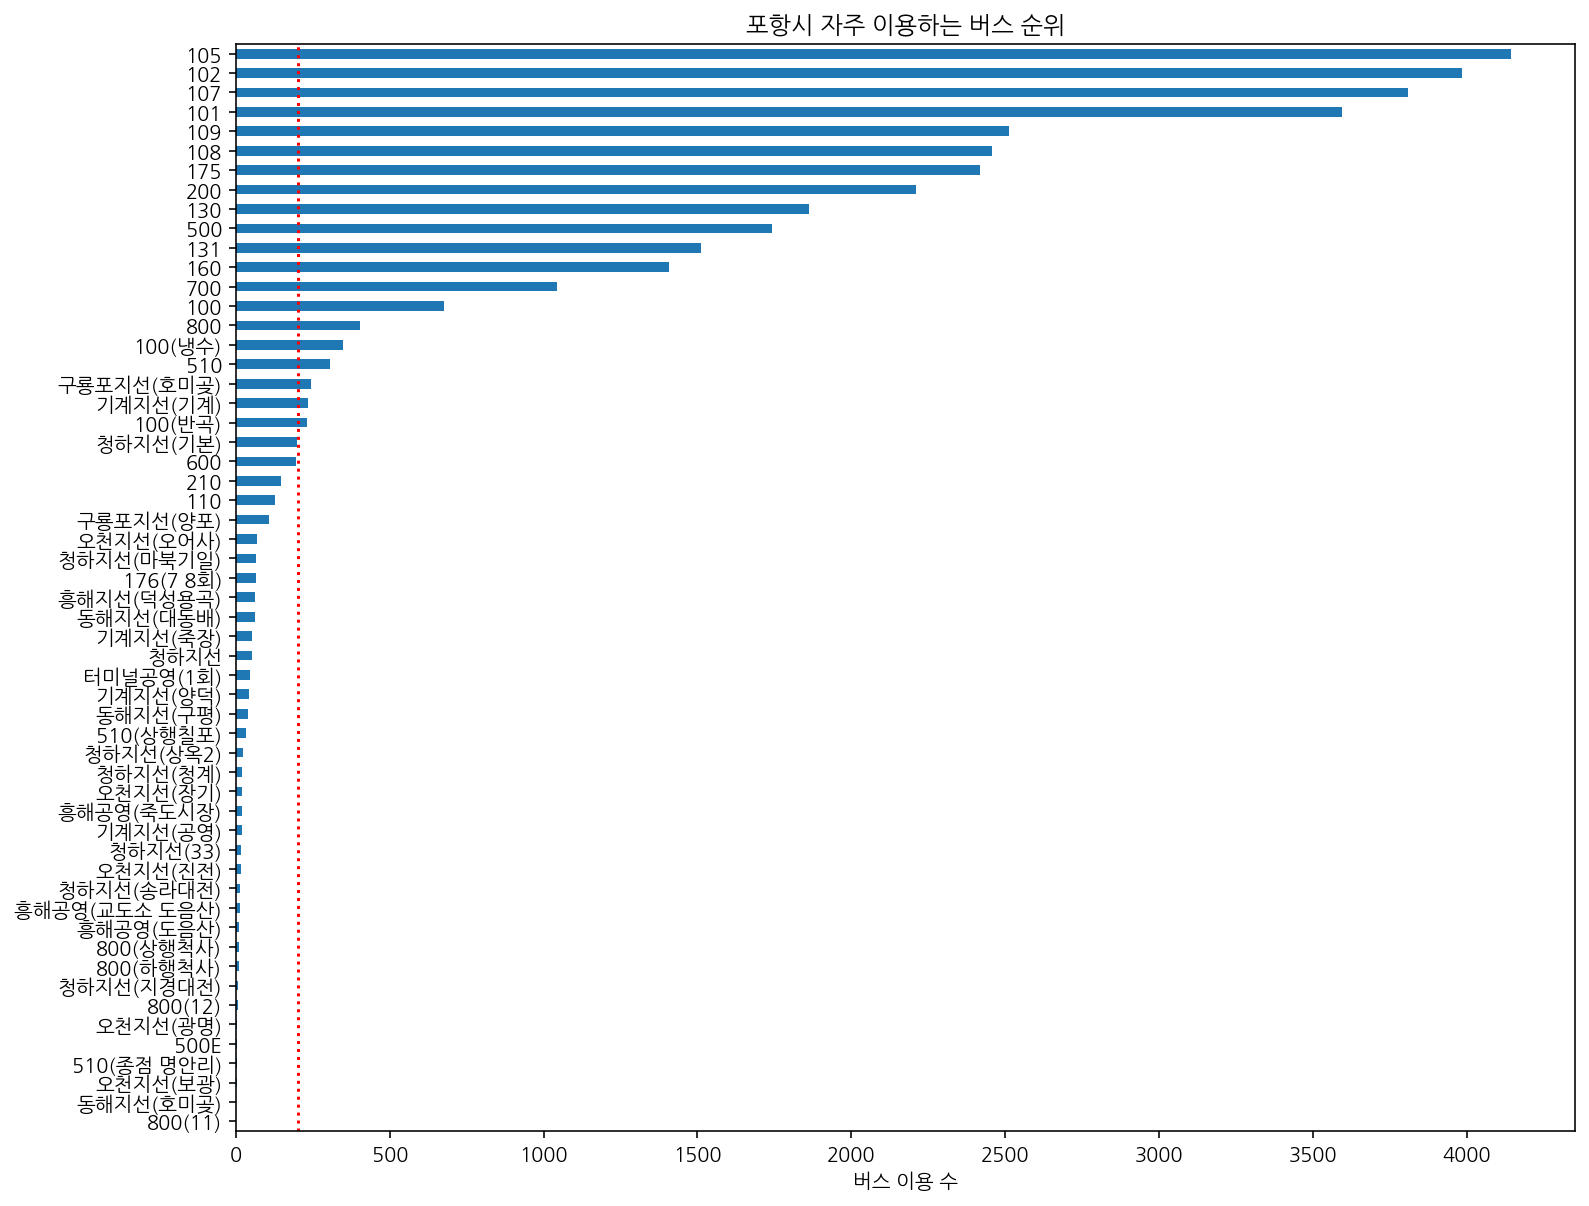

In [28]:
# 3월1일부터 7일까지 일주일 동안 가장 많이 이용한 버스는?
df_route = df['노선명'].value_counts().sort_values(ascending=True)
df_route.plot(kind = 'barh', figsize = (12,10), title = '포항시 자주 이용하는 버스 순위')
plt.axvline(200, c='r', ls=':')
plt.xlabel('버스 이용 수')
# 가장 많이 이용하는 버스 TOP 5 : 100번대 버스
# 100번대 버스의 노선 확인하여 가장 많이 지나가는 정류장 알아보기

## 💡 Point 2. 제일 많이 들르는 경유지(isin, str.contains)

In [29]:
# Top 5 버스는 ? (isin)
df.loc[df['노선명'].isin(['105','102','107', '101','109'])].value_counts
# 일주일동안 버스이용내역 전체 36718건 중 18049건 차지
# 가장 많이 등장하는 '양덕' & '터미널' 로 검색해보기

<bound method DataFrame.value_counts of                      승차시각                하차시각  노선명                  노선경유지  \
5     2020-03-01 05:33:22 2020-03-01 05:43:53  105            양덕-시외터미널-지곡   
7     2020-03-01 05:37:20 2020-03-01 06:00:26  107        문덕-시외(고속)터미널-흥해   
8     2020-03-01 05:38:36 2020-03-01 05:52:37  105            양덕-시외터미널-지곡   
11    2020-03-01 05:46:28 2020-03-01 05:56:07  105            양덕-시외터미널-지곡   
16    2020-03-01 05:55:03 2020-03-01 06:08:07  102  문덕-남구청-고속터미널-북구보건소-양덕   
...                   ...                 ...  ...                    ...   
36709 2020-03-07 23:18:26 2020-03-07 23:27:32  107        문덕-시외(고속)터미널-흥해   
36712 2020-03-07 23:21:57 2020-03-07 23:27:43  102  문덕-남구청-고속터미널-북구보건소-양덕   
36714 2020-03-07 23:28:51 2020-03-07 23:38:17  102  문덕-남구청-고속터미널-북구보건소-양덕   
36716 2020-03-07 23:44:04 2020-03-07 23:48:11  105            양덕-시외터미널-지곡   
36717 2020-03-07 23:51:54 2020-03-07 23:58:27  107        문덕-시외(고속)터미널-흥해   

      승객연령 환승여부 추가운임여부       승차정류장 

In [30]:
# Top5 버스가 '양덕' or '터미널'을 얼마나 경유할까 ? (str.contains)
df.loc[df['노선경유지'].str.contains('양덕|터미널')]
# 대부분 양덕이나 터미널 경유 (32276건)
# 거의 경유하지 않는 버스가 없다

,승차시각,하차시각,노선명,노선경유지,승객연령,환승여부,추가운임여부,승차정류장,승차정류장 GPS X,승차정류장 GPS Y,하차정류장,하차정류장 GPS X,하차정류장 GPS Y
1,2020-03-01 05:17:56,2020-03-01 06:00:27,500,문덕-시외터미널-흥해-청하-월포,일반,N,N,문덕사거리,129.403442,35.962846,성곡1리,129.342082,36.092129
2,2020-03-01 05:21:12,2020-03-01 05:22:53,175,문덕-고속터미널-선린병원-달전,일반,N,N,오천농협,129.402810,35.970003,부영사랑3차,129.402520,35.973038
3,2020-03-01 05:21:16,2020-03-01 05:55:47,175,문덕-고속터미널-선린병원-달전,일반,N,N,오천농협,129.402810,35.970003,죽도시장,129.365169,36.035704
4,2020-03-01 05:32:58,2020-03-01 05:39:00,131,양덕-송도-시청-양학-양덕,일반,N,N,형산시장,129.364385,36.013877,교보생명,129.352235,36.015721
5,2020-03-01 05:33:22,2020-03-01 05:43:53,105,양덕-시외터미널-지곡,일반,N,N,두호초등학교,129.371202,36.064088,중앙상가,129.365461,36.037830
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36713,2020-03-07 23:26:24,2020-03-07 23:27:42,500,문덕-시외터미널-흥해-청하-월포,일반,N,N,중앙상가,129.365461,36.037830,홈플러스,129.364714,36.031262
36714,2020-03-07 23:28:51,2020-03-07 23:38:17,102,문덕-남구청-고속터미널-북구보건소-양덕,일반,Y,N,선린병원,129.367967,36.047229,북구보건소,129.379230,36.070520
36715,2020-03-07 23:32:08,2020-03-07 23:35:22,108,양덕-죽도-양학-시청-유강-지곡,일반,N,N,효자사거리,129.338047,36.008512,유강청구타운,129.319474,36.005039
36716,2020-03-07 23:44:04,2020-03-07 23:48:11,105,양덕-시외터미널-지곡,일반,N,N,영일대 해수욕장,129.376335,36.054052,두호초등학교,129.371682,36.064912


In [31]:
# '노선경유지' 에서 파생시켜서 만든 변수로 '~맛집' 만들어서
# 양덕'이나 '터미널'을 경유한다하면 GPS번호 따서 근처 맛집 별점 높은순서대로 링크 만들어서 넣고 싶은데....
# 아이디어는 있지만 아직은 무리인 것 같습니다

## 💡 Point 3. 일 / 요일 / 시간대 별 버스 승하차 수 (파생변수)

*   1) 일 별
*   2) 요일 별
*   3) 시간대 별



### 일 별 버스 이용내역

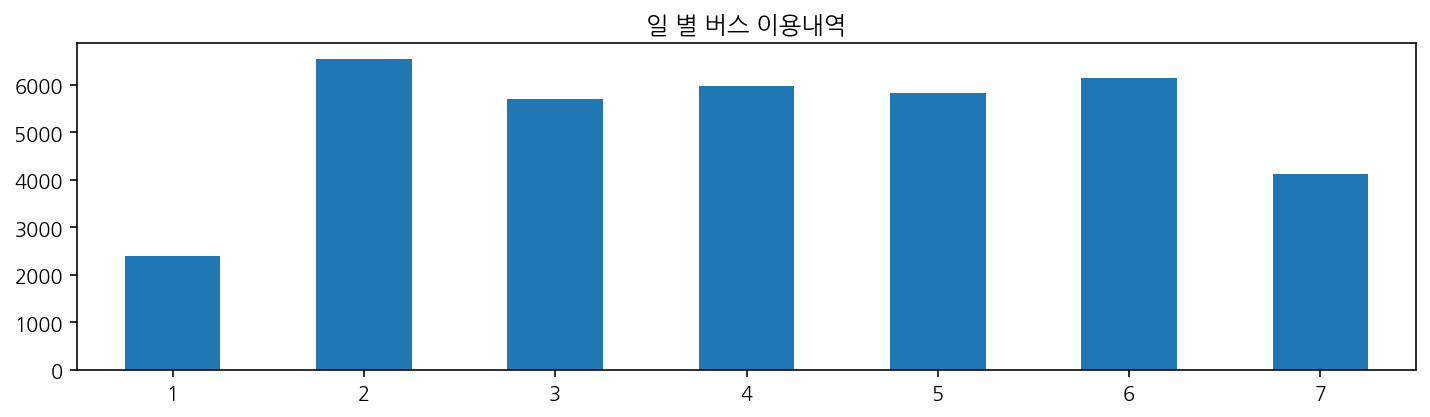

In [32]:
# 2020년 3월 1일부터 7일까지 이용내역
bus_count = df['승차시각'].dt.day.value_counts().sort_index()
bus_count.plot(kind = 'bar', rot = 0, figsize = (12,3), title ='일 별 버스 이용내역')
# bus_count.plot(kind = 'bar', figsize = '16,6', title = '일 별 버스 이용내역')

### 요일 별 버스 이용내역

In [33]:
# '요일' 파생변수 생성
# '요일' 잘 생성 되었는지 확인
# 2020년 3월 1일은 일요일  
df['요일'] = df['승차시각'].dt.dayofweek 
df.head(2)

,승차시각,하차시각,노선명,노선경유지,승객연령,환승여부,추가운임여부,승차정류장,승차정류장 GPS X,승차정류장 GPS Y,하차정류장,하차정류장 GPS X,하차정류장 GPS Y,요일
0,2020-03-01 05:15:47,2020-03-01 05:19:50,160,문덕-대송-송도-죽도-용흥,일반,N,N,문덕사거리,129.403442,35.962846,성우오토모티브,129.384492,35.972675,6
1,2020-03-01 05:17:56,2020-03-01 06:00:27,500,문덕-시외터미널-흥해-청하-월포,일반,N,N,문덕사거리,129.403442,35.962846,성곡1리,129.342082,36.092129,6


In [34]:
#요일 별 이용 수 구한 뒤 인덱스 번호로 정렬
#value로 정렬하면 버스 이용 수로 정렬함
weekday_bus = df['요일'].value_counts().sort_index()
weekday_bus

0    6545
1    5697
2    5978
3    5830
4    6152
5    4114
6    2402
Name: 요일, dtype: int64

In [35]:
# 일주일 리스트 생성
weekday_list = list('월화수목금토일')

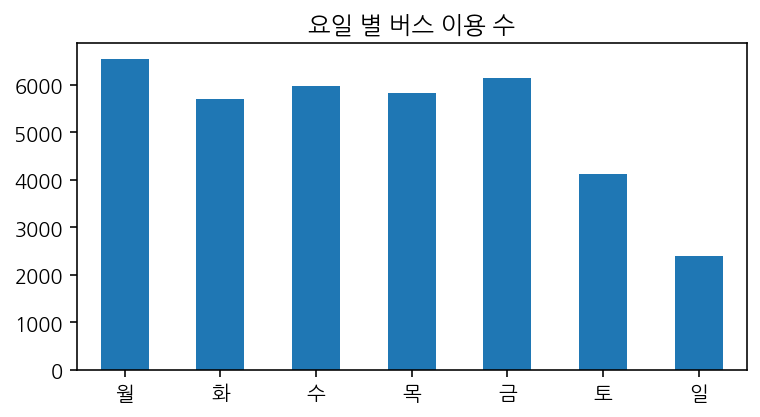

In [36]:
weekday_bus.index = weekday_list
weekday_bus .plot.bar(rot=0, figsize = (6,3), title = '요일 별 버스 이용 수')
# 평일에 제일 많다. 공업단지도 많고 해서 평일에 출퇴근하는 사람들의 이용량이 많은 것 같다.
# 주말은 생각보다 적은데 포항 주민이면 돌아다닐 일이 없고, 
# 놀러온 사람들은 차를 빌리거나 택시를 타서 대중교통의 의존도가 적은것일까 추측해본다.
# 버스들의 노선이나 승하차 정류장을 보면 출퇴근 및 통학과 연관이 있는지 알 수 있을 것 같다.

In [37]:
def find_dayofweek(day_no):
    weekday_list = list('월화수목금토일')
    return weekday_list[day_no]

find_dayofweek(0)

'월'

In [38]:
# df['요일명'] = map(find_dayofweek,list(df['요일']))

### 시간대 별 버스 이용 수 (figure : 빈 프레임 만들기, fig.add_subplot : 서브플랏 추가

✅ plt.figure()
- figure()은 Figure인스턴스를 생성.
  이미지 전체의 영역을 확보
- 그래프는 빈 칸
✅ fig.add_subplot()
-  plt.figure()으로 그래프를 그리기 위해서는 subplot를 추가
- fig = plt.figure()
- fig.add_subplot(111)

✅111의 의미는, 1행째의 1열의 첫 번째라는 의미로, subplot(1, 1, 1) 로 작성해도 동일하게 작동한다. subplot는 Axes오브젝트를 반환한다. Axes는 그래프의 이미지, 축의 메모리, 라벨의 설정 등을 맡고 있다.

✅plt.subplot()


*    plt.subplot()는 add_subplot와 동일하게, 인수에 행의 수, 열의 수 및 몇 번째 등을 지정. 
*   add_subplot과 다른 점은 현재의 이미지영역(fig=figure())에 추가하는 메소드.



✅Axes :
*   Axes 객체는 실제 이미지 데이터의 역할을 한다
*   Axes 객체에 대해 그려질 데이터를 전달하거나, set_xlabel, set_ylabel, set_title로 라벨이나 타이틀의 설정.

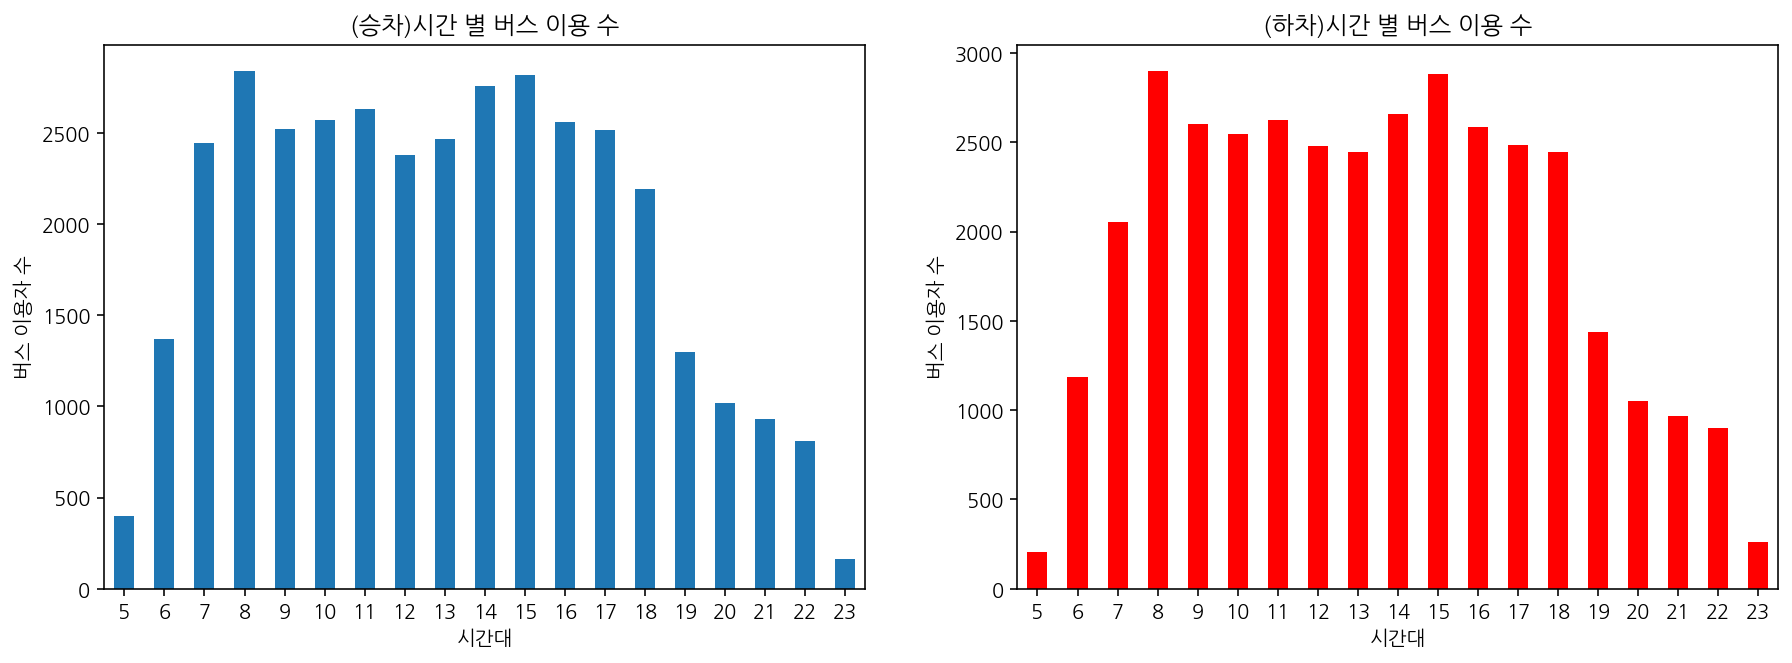

In [39]:
# +으쌰으쌰 팀 동기 민정님 코드 참고하여 '하차시각'도 바로 옆에 비교해보기!
# ax =  An axes of the current figure. ?을통해 공식문서에 아규먼트확인
# 그래프 객체 생성(figure에 2개의 서브플롯 생성)
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1) #한줄에 2개의 서브플랏 중 첫번째
ax2 = fig.add_subplot(1,2,2)

ax1.set_xlabel('시간대')
ax1.set_ylabel('버스 이용자 수')
ax2.set_xlabel('시간대')
ax2.set_ylabel('버스 이용자 수')


df_hour1 = df['승차시각'].dt.hour.value_counts().sort_index()
df_hour1.plot(kind = 'bar', rot = 0, title ='(승차)시간 별 버스 이용 수', ax=ax1)

df_hour2 = df['하차시각'].dt.hour.value_counts().sort_index()
df_hour2.plot(kind = 'bar', rot = 0, color = 'red', title ='(하차)시간 별 버스 이용 수', ax=ax2)

In [40]:
# 일주일 간 시간대 별로 확인해 보니 아무래도 출근 시간인 7~8시간에 이용량이 많긴한데
# 18시까지 꾸준히 많다... 딱히 출근시간뿐만 아니라 평일 낮에도 사람들이 자주 이용하는것 같다
# 이것 역시 노선과 정류장을 확인해봐야 위치 및 시간을 고려하여 보다 정확하게 분석할 수 있을 것 같다.

## 💡 Point 4. 연령대와 버스 이용내역의 상관관계 (crosstab, ~(값 제외))

In [41]:
# 승객연령과 같이 비교해 보기 좋은 컬럼은 시간대별 버스 이용내역인 것 같다.

In [42]:
df['승객연령'].value_counts()
#None값은 뭐지..? 어르신 및 국가유공자 할인 받으신 분들인가..?
#None값은 제거    

일반      35051
청소년      1477
어린이       165
None       25
Name: 승객연령, dtype: int64

In [43]:
df_none = df[~(df['승객연령'] == 'None')]
df_none

,승차시각,하차시각,노선명,노선경유지,승객연령,환승여부,추가운임여부,승차정류장,승차정류장 GPS X,승차정류장 GPS Y,하차정류장,하차정류장 GPS X,하차정류장 GPS Y,요일
0,2020-03-01 05:15:47,2020-03-01 05:19:50,160,문덕-대송-송도-죽도-용흥,일반,N,N,문덕사거리,129.403442,35.962846,성우오토모티브,129.384492,35.972675,6
1,2020-03-01 05:17:56,2020-03-01 06:00:27,500,문덕-시외터미널-흥해-청하-월포,일반,N,N,문덕사거리,129.403442,35.962846,성곡1리,129.342082,36.092129,6
2,2020-03-01 05:21:12,2020-03-01 05:22:53,175,문덕-고속터미널-선린병원-달전,일반,N,N,오천농협,129.402810,35.970003,부영사랑3차,129.402520,35.973038,6
3,2020-03-01 05:21:16,2020-03-01 05:55:47,175,문덕-고속터미널-선린병원-달전,일반,N,N,오천농협,129.402810,35.970003,죽도시장,129.365169,36.035704,6
4,2020-03-01 05:32:58,2020-03-01 05:39:00,131,양덕-송도-시청-양학-양덕,일반,N,N,형산시장,129.364385,36.013877,교보생명,129.352235,36.015721,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36713,2020-03-07 23:26:24,2020-03-07 23:27:42,500,문덕-시외터미널-흥해-청하-월포,일반,N,N,중앙상가,129.365461,36.037830,홈플러스,129.364714,36.031262,5
36714,2020-03-07 23:28:51,2020-03-07 23:38:17,102,문덕-남구청-고속터미널-북구보건소-양덕,일반,Y,N,선린병원,129.367967,36.047229,북구보건소,129.379230,36.070520,5
36715,2020-03-07 23:32:08,2020-03-07 23:35:22,108,양덕-죽도-양학-시청-유강-지곡,일반,N,N,효자사거리,129.338047,36.008512,유강청구타운,129.319474,36.005039,5
36716,2020-03-07 23:44:04,2020-03-07 23:48:11,105,양덕-시외터미널-지곡,일반,N,N,영일대 해수욕장,129.376335,36.054052,두호초등학교,129.371682,36.064912,5


In [44]:
df_age_bus = pd.crosstab(df_none['승객연령'], df_none['승차시각'].dt.hour)
df_age_bus

승차시각,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
승객연령,,,,,,,,,,,,,,,,,,,
어린이,1,1,2,12,6,6,22,13,20,10,12,9,14,17,6,3,5,6,0
일반,391,1320,2406,2765,2473,2492,2523,2268,2337,2609,2686,2411,2382,2084,1200,937,867,748,152
청소년,4,43,38,63,47,76,86,99,113,137,122,140,122,94,91,76,59,59,8


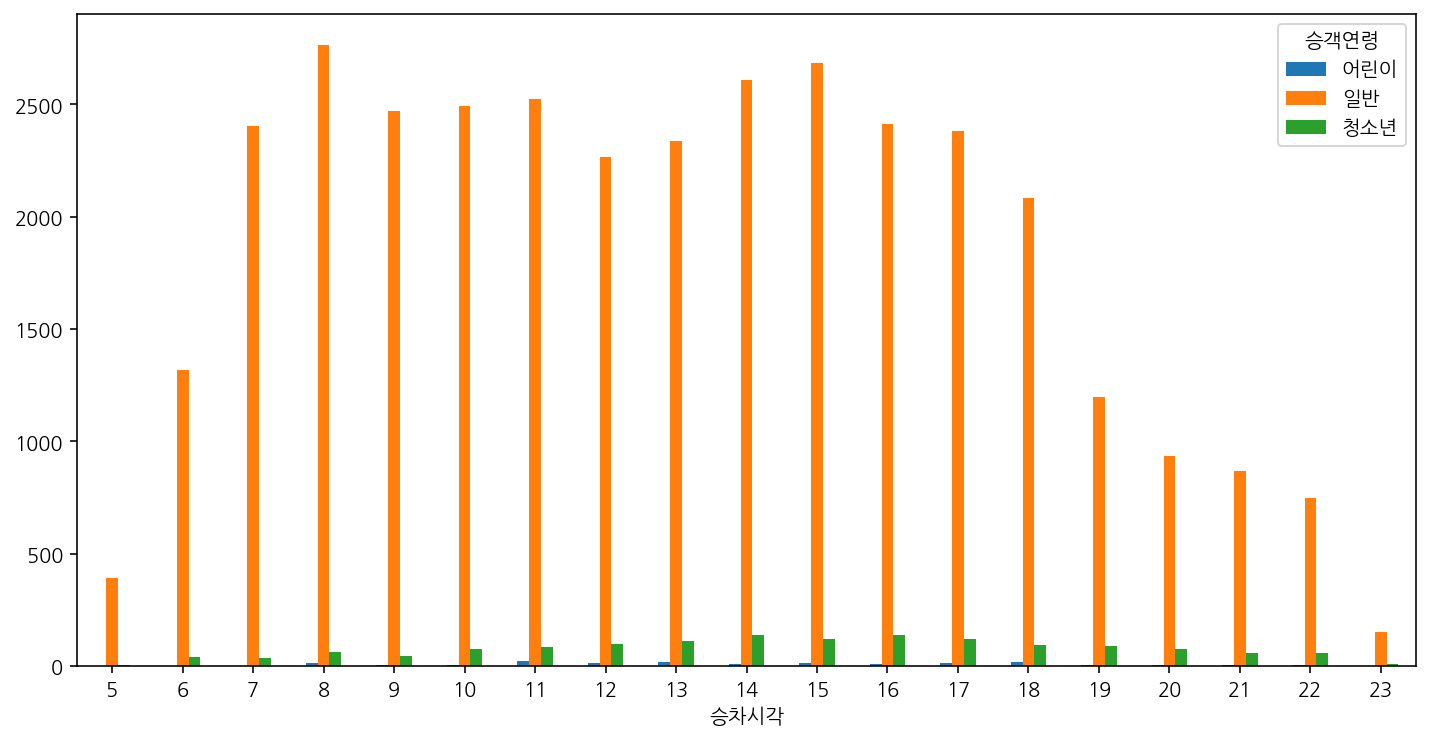

In [45]:
df_age_bus.T.plot(rot = 0, kind = 'bar', figsize = (12,6))
# 일반 승객 수가 가장 많고, 출근 피크시간인 8시가 가장 이용량이 많다.
# 오히려 퇴근시간보다 14-15시가 이용량이 많은데 왜 그럴까 ?
# 공업단지가 많아서 일찍 퇴근하셔서 일찍 퇴근하시나 ..? 
# 그러면 조금 더 이른 시간에 이용량이 많아야 할텐데
# 이것만으로는 잘 모르겠다

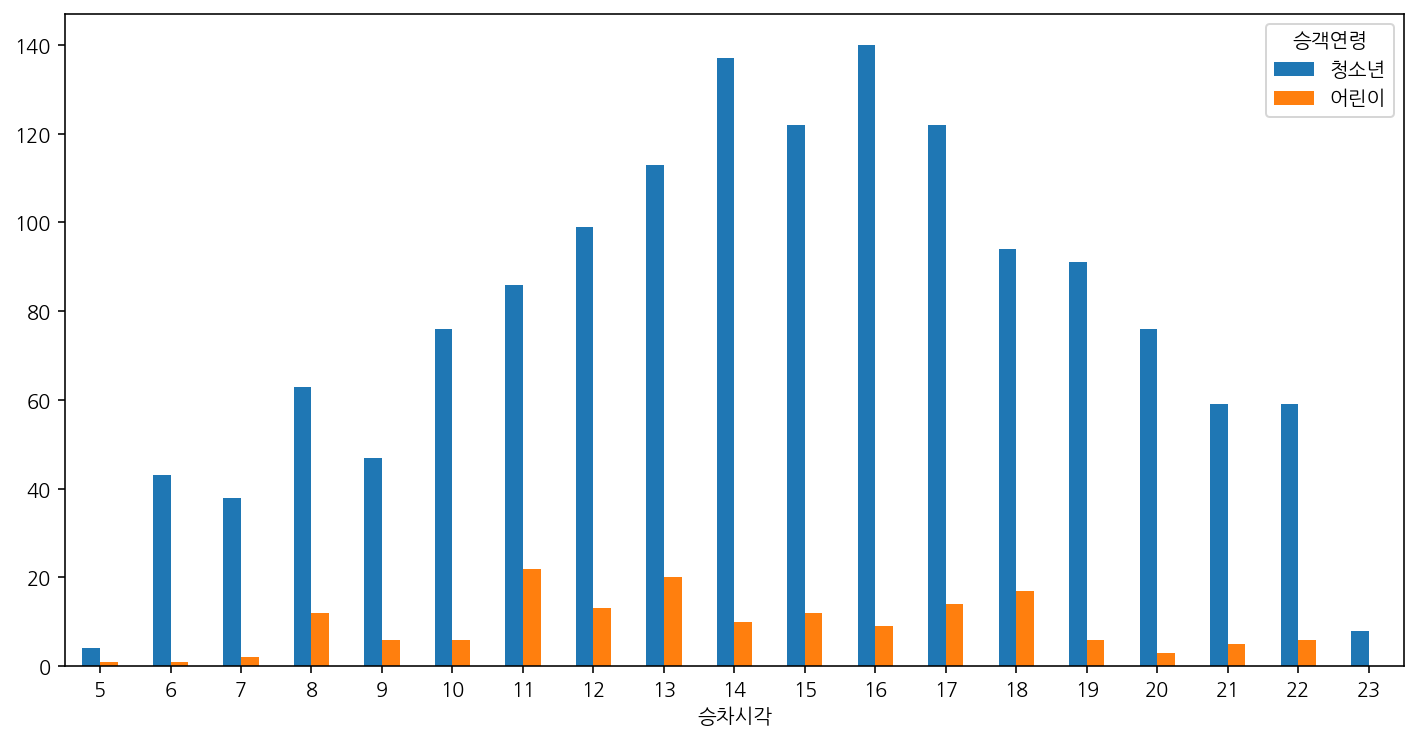

In [46]:
# 일반승객과 청소년,어린이 데이터의 갭이 너무 커서 어린이와 청소년만 따로 비교하기
# 어린이는 거의없다. 혼자타는 경우는 거의 없고 부모님들을 대동하니까 같이 찍어주셔서 없을 것 같다.
# 청소년의 버스이용량은 14시 16시가 피크이다.
# 16시는 끝나고 놀러가거나 공부 및 학원가는 시간인 것 같고
# 14시에는 왜 많을까...? 중고등학생 말고 초등학생은 6교시(14시) 에 끝마쳐서 그런 것 같긴하다.
df_age_bus.T[['청소년', '어린이']].plot(rot = 0, kind = 'bar', figsize = (12,6))

# 지도 시각화 🔥🌏

🔥 막간 상식

In [47]:
# 위도 : 지구 위의 위치를 나타내는 좌표축 중에서 가로로 된 것 (GPS X값)

# 경도 :지구상의 위치를 표현할때 사용되는 좌표로 기준선인 본초자오선으로부터 
#       동쪽이나 서쪽으로 얼마나 떨어져 있는지에 대한 값

# 본초 자오선 : 지구상에서 동서(東西)간 위치를 표시할 때 기준이 되는 자오선으로, 
#               영국 런던의 구(舊)그리니치 천문대(현재 케임브리지로 이전)를 지나는 자오선

In [48]:
# 승차정류장들의 위치 중심은 ? 
# 참고 ! GPS ( X , Y )에서 X가 경도 , Y가 위도
# 승차 정류장 들 center = ( 36.032621, 129.370183 )
df.describe()

,승차정류장 GPS X,승차정류장 GPS Y,하차정류장 GPS X,하차정류장 GPS Y,요일
count,36718.000000,36718.000000,36718.000000,36718.000000,36718.000000
mean,129.370183,36.032621,129.369419,36.030132,2.580015
std,0.049462,0.045882,0.040717,0.036492,1.848207
min,129.025585,35.804119,129.052958,35.804119,0.000000
25%,129.350580,36.006417,129.354538,36.013250,1.000000
50%,129.366210,36.029520,129.365460,36.033299,3.000000
75%,129.387127,36.064088,129.371682,36.041941,4.000000
max,129.579045,36.303479,129.578203,36.291213,6.000000


In [49]:
# 승차 정류장들의 중심 위치
pohang= folium.Map(location=[36.032621, 129.370183], zoom_start= 11)
pohang

In [50]:
for stop, lat, lng in zip(df['승차정류장'],df['승차정류장 GPS Y'],df['승차정류장 GPS X']):
    folium.CircleMarker([lat,lng],
                        radius= 10, #원의 반지름
                        color = 'brown', #원 둘레 색상
                        fill = True,
                        fill_color = 'coral', # 원 내부 색상
                        fill_opacity = 0.7, # 원 투명도
                        popup=stop # 누르면 승차정류장 이름 뜨게하기
    ).add_to(pohang)

In [51]:
pohang.save('pohang_bus_station.html')

In [52]:
# # 승차정류장들의 위치 받아오기
# gps_xy = df[['승차정류장 GPS X', '승차정류장 GPS Y']].values[:len(df.index)].tolist()

# # for 문 사용하여 점 찍가
# for i in range(len(df.index)):  
#     folium.Circle(location=gps_xy[i],radius=5,color='blue',fill = True).add_to(pohang)

# # 마커 추가
# folium.Marker(location = gps_xy[10],tooltip = df['승차정류장'][10],icon = folium.Icon(color = 'blue',icon = 'info-sign')).add_to(pohang)
# pohang

In [53]:
# 아래와 같은 반복문으로 gps 데이터 시도했는데 계속 상단에 RAM 바가 꽉차면서 커널이 초기화됩니다(55%에서)..
# 그래서 일단 5000개 데이터만 수집해보기

In [54]:
# from tqdm import tqdm
# from tqdm import trange
# gps_xy = [df[['승차정류장 GPS X', '승차정류장 GPS Y']].iloc[i] for i in trange(20000)]
# gps_xy

💡 깨달음!

In [55]:
# 좀 더 이유를 알아보고 구글링 해보니 위에서는 시리즈로 가져오려고 했고
# 간단히 숫자 데이터만 담아와서 리스트에 넣어주면 된다..

In [55]:
# 그런데 구글링해서 다양한 코드 및 동기분들의 코드를 그대로 가져와서 해봐도 표시가 되질 않는다..